# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [ ]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 10 baris pertama dengan function `head()`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info()`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe()`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [ ]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [ ]:
# Tampilkan 10 baris pertama dengan function head.
df.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37.0,Doctor,139.0,1.0,13316.71,2024-11-04 08:10:09
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67.0,Retired,291.0,1.0,2796.24,2024-11-04 08:10:55
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Credit,Detroit,D000690,24.148.92.177,M035,Branch,51.0,Engineer,86.0,1.0,9095.14,2024-11-04 08:11:14
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Debit,Nashville,D000199,32.169.88.41,M007,ATM,55.0,Doctor,120.0,1.0,1021.88,2024-11-04 08:06:32


In [ ]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
info = df.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [ ]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

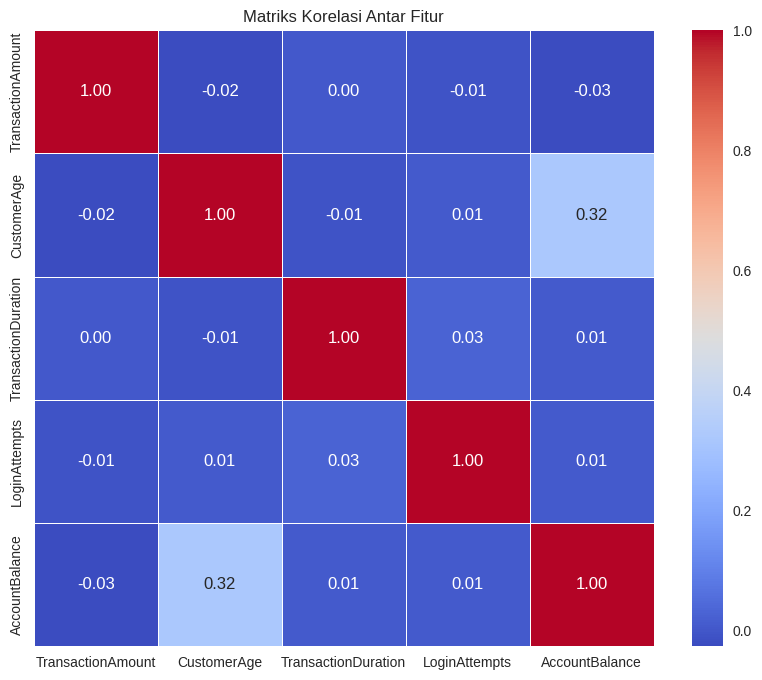

In [ ]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
numerical_columns = df.select_dtypes(include=['number']).columns

# Mengganti NaN dengan median pada kolom numerik
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Matriks korelasi antar kolom numerik
correlation_matrix = df[numerical_columns].corr()

# Membuat heatmap untuk matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Antar Fitur')
plt.show()

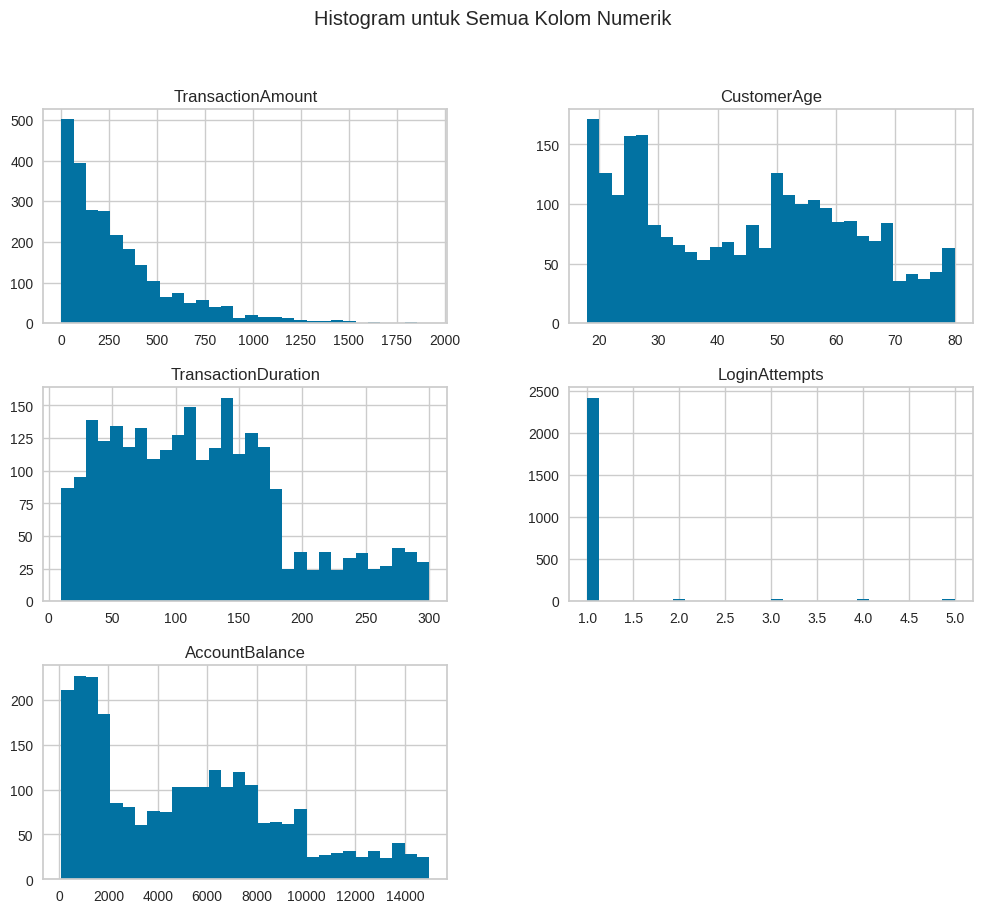

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.hist(figsize=(12, 10), bins=30)
plt.suptitle('Histogram untuk Semua Kolom Numerik')
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

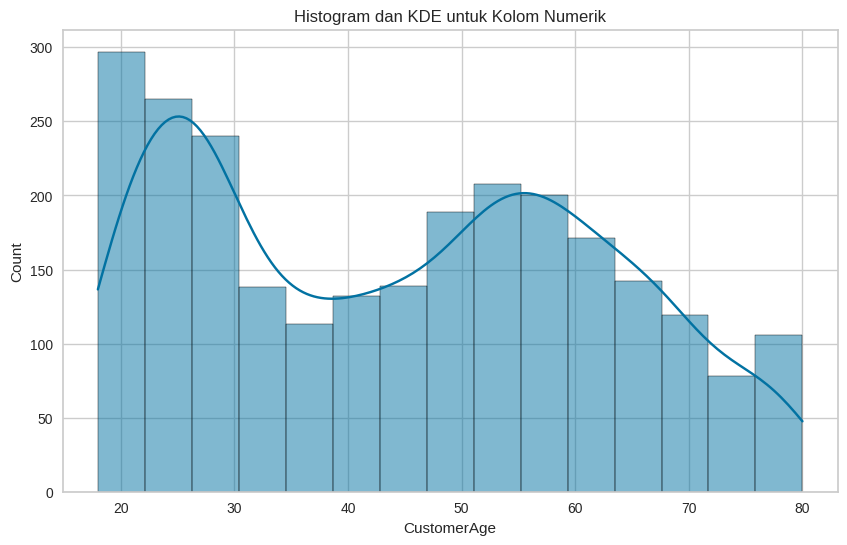

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
plt.figure(figsize=(10, 6))
sns.histplot(df['CustomerAge'], kde=True, bins=15)
plt.title('Histogram dan KDE untuk Kolom Numerik')
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [ ]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,0
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [ ]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 22


In [ ]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.

# Salin dataset asli untuk referensi
df_scaler = df.copy()

# Mendapatkan kolom numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Tentukan kolom yang tidak relevan untuk scaling (misal kolom ID atau tanggal)
non_relevant_columns = ['TransactionID', 'AccountID', 'TransactionDate', 'IP Address',
                       'DeviceID', 'MerchantID', 'Channel', 'Location',
                       'CustomerOccupation', 'PreviousTransactionDate', 'TransactionType']

# Pilih kolom numerik yang relevan untuk scaling
relevant_numerical_columns = [col for col in numerical_columns if col not in non_relevant_columns]

# Tangani nilai NaN pada kolom numerik dengan mengganti NaN dengan median
df_scaler[relevant_numerical_columns] = df_scaler[relevant_numerical_columns].fillna(df_scaler[relevant_numerical_columns].median())

# Inisialisasi scaler
scaler = StandardScaler()  # Jika ingin menggunakan MinMaxScaler, ganti menjadi scaler = MinMaxScaler()

# Fit scaler pada data dan transform fitur numerik yang relevan
df_scaler[relevant_numerical_columns] = scaler.fit_transform(df_scaler[relevant_numerical_columns])

# Cek hasil scaling dengan melihat rata-rata dan standar deviasi (harus mendekati 0 dan 1)
print("Rata-rata setelah scaling:")
print(df_scaler[relevant_numerical_columns].mean())
print("\nStandar deviasi setelah scaling:")
print(df_scaler[relevant_numerical_columns].std())

Rata-rata setelah scaling:
TransactionAmount      3.360864e-17
CustomerAge            1.778457e-16
TransactionDuration    4.481152e-17
LoginAttempts          1.680432e-17
AccountBalance        -6.721729e-17
dtype: float64

Standar deviasi setelah scaling:
TransactionAmount      1.000197
CustomerAge            1.000197
TransactionDuration    1.000197
LoginAttempts          1.000197
AccountBalance         1.000197
dtype: float64


In [ ]:
# Melakukan feature encoding menggunakan pd.get_dummies() atau LabelEncoder() untuk fitur kategorikal.

# Salin dataset hasil scaling sebelumnya
df_lencoder = df_scaler.copy()

# Mendapatkan kolom kategorikal
category_features = df_lencoder.select_dtypes(include=['object', 'category']).columns.tolist()

# Tangani nilai NaN dengan mengganti NaN dengan 'Missing' pada kolom kategorikal
for col in category_features:
    if df_lencoder[col].isnull().any():
        print(f'Kolom {col} memiliki NaN, melakukan imputasi.')
    df_lencoder[col] = df_lencoder[col].fillna('Missing')  # Ganti NaN dengan 'Missing'

# Lakukan One-Hot Encoding menggunakan pd.get_dummies()
df_lencoder = pd.get_dummies(df_lencoder, columns=category_features, drop_first=True)

# Tampilkan beberapa baris hasil encoding
print("Kolom yang diencode:", category_features)
print(df_lencoder.head())

Kolom TransactionID memiliki NaN, melakukan imputasi.
Kolom AccountID memiliki NaN, melakukan imputasi.
Kolom TransactionDate memiliki NaN, melakukan imputasi.
Kolom TransactionType memiliki NaN, melakukan imputasi.
Kolom Location memiliki NaN, melakukan imputasi.
Kolom DeviceID memiliki NaN, melakukan imputasi.
Kolom IP Address memiliki NaN, melakukan imputasi.
Kolom MerchantID memiliki NaN, melakukan imputasi.
Kolom Channel memiliki NaN, melakukan imputasi.
Kolom CustomerOccupation memiliki NaN, melakukan imputasi.
Kolom PreviousTransactionDate memiliki NaN, melakukan imputasi.
Kolom yang diencode: ['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0          -0.972081     1.424796            -0.550102      -0.203745   
1           0.273272     1.312249             0.310623      -0.20

In [ ]:
# Melakukan drop pada kolom yang memiliki keterangan id

# Tentukan kolom yang ingin dihapus
columns_to_drop = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']

# Pastikan kolom yang ingin dihapus ada dalam dataframe
columns_to_drop_existing = [col for col in columns_to_drop if col in df_lencoder.columns]

# Hapus kolom yang ada
df_lencoder.drop(columns=columns_to_drop_existing, inplace=True)

# Tampilkan hasil
print(df_lencoder.head())

   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0          -0.972081     1.424796            -0.550102      -0.203745   
1           0.273272     1.312249             0.310623      -0.203745   
2          -0.586250    -1.445136            -0.908738      -0.203745   
3          -0.386079    -1.051223            -1.353446      -0.203745   
4          -0.974281     0.017967             1.128313      -0.203745   

   AccountBalance  TransactionID_TX000001  TransactionID_TX000002  \
0        0.000725                    True                   False   
1        2.231209                   False                    True   
2       -1.028491                   False                   False   
3        0.892446                   False                   False   
4        0.598462                   False                   False   

   TransactionID_TX000003  TransactionID_TX000004  TransactionID_TX000005  \
0                   False                   False                   F

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
# Mengisi NaN pada kolom kategorikal dengan modus

# Menangani data yang hilang (NaN) dengan imputasi
print("Jumlah NaN sebelum imputasi:")
print(df_lencoder.isnull().sum())

# Isi NaN pada kolom numerik dengan median dan kolom kategorikal dengan modus
for col in df_lencoder.columns:
    if df_lencoder[col].isnull().any():
        if df_lencoder[col].dtype == 'object':  # Kolom kategorikal
            mode_val = df_lencoder[col].mode()[0]  # Menggunakan modus untuk kolom kategorikal
            print(f'Imputasi kolom {col} (kategorikal) dengan modus {mode_val}')
            df_lencoder[col] = df_lencoder[col].fillna(mode_val)
        else:  # Kolom numerik
            median_val = df_lencoder[col].median()  # Menggunakan median untuk kolom numerik
            print(f'Imputasi kolom {col} (numerik) dengan median {median_val}')
            df_lencoder[col] = df_lencoder[col].fillna(median_val)

# Cek hasil setelah imputasi
print("\nJumlah NaN setelah imputasi:")
print(df_lencoder.isnull().sum())

Jumlah NaN sebelum imputasi:
TransactionAmount                              0
CustomerAge                                    0
TransactionDuration                            0
LoginAttempts                                  0
AccountBalance                                 0
                                              ..
PreviousTransactionDate_2024-11-04 08:12:20    0
PreviousTransactionDate_2024-11-04 08:12:21    0
PreviousTransactionDate_2024-11-04 08:12:22    0
PreviousTransactionDate_2024-11-04 08:12:23    0
PreviousTransactionDate_Missing                0
Length: 7253, dtype: int64

Jumlah NaN setelah imputasi:
TransactionAmount                              0
CustomerAge                                    0
TransactionDuration                            0
LoginAttempts                                  0
AccountBalance                                 0
                                              ..
PreviousTransactionDate_2024-11-04 08:12:20    0
PreviousTransactionDate_2024-11-

In [ ]:
# Menghapus data duplikat menggunakan drop_duplicates().
drop_duplicates = df_lencoder.drop_duplicates()

print(drop_duplicates.head())

   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0          -0.972081     1.424796            -0.550102      -0.203745   
1           0.273272     1.312249             0.310623      -0.203745   
2          -0.586250    -1.445136            -0.908738      -0.203745   
3          -0.386079    -1.051223            -1.353446      -0.203745   
4          -0.974281     0.017967             1.128313      -0.203745   

   AccountBalance  TransactionID_TX000001  TransactionID_TX000002  \
0        0.000725                    True                   False   
1        2.231209                   False                    True   
2       -1.028491                   False                   False   
3        0.892446                   False                   False   
4        0.598462                   False                   False   

   TransactionID_TX000003  TransactionID_TX000004  TransactionID_TX000005  \
0                   False                   False                   F

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

# Salin dataset hasil encoding dan scaling sebelumnya
df_outlier = df_lencoder.copy()

# Tentukan kolom numerik yang akan dicek outlier
numerical_cols = df_outlier.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Fungsi deteksi outlier menggunakan IQR
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Threshold jumlah outlier untuk memutuskan drop atau imputasi
threshold = 10  # Contoh: jika outlier > 10, lakukan imputasi, kalau <= 10, drop

for col in numerical_cols:
    outliers = detect_outliers_iqr(df_outlier[col])
    num_outliers = outliers.sum()
    print(f"Kolom {col} memiliki {num_outliers} outlier")

    if num_outliers == 0:
        continue  # Tidak ada outlier, lanjutkan ke kolom berikutnya

    if num_outliers <= threshold:
        # Drop baris yang memiliki outlier di kolom tersebut
        df_outlier = df_outlier[~outliers]
        print(f"Drop {num_outliers} baris di kolom {col} karena jumlah outlier kecil")
    else:
        # Imputasi nilai outlier dengan median kolom
        median_val = df_outlier.loc[~outliers, col].median()
        df_outlier.loc[outliers, col] = median_val
        print(f"Imputasi nilai outlier di kolom {col} dengan median {median_val}")

# Reset index setelah drop baris
df_outlier.reset_index(drop=True, inplace=True)

print("Handling outlier selesai.")


Kolom TransactionAmount memiliki 114 outlier
Imputasi nilai outlier di kolom TransactionAmount dengan median -0.33332775501241835
Kolom CustomerAge memiliki 0 outlier
Kolom TransactionDuration memiliki 0 outlier
Kolom LoginAttempts memiliki 120 outlier
Imputasi nilai outlier di kolom LoginAttempts dengan median -0.20374543196723224
Kolom AccountBalance memiliki 0 outlier
Handling outlier selesai.


In [ ]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder atau get_dummies.

ddf_binning = df_lencoder.copy()

# Melakukan binning pada dua fitur numerik dengan rentang yang ditentukan secara manual
df_binning['CustomerAge_Binned'] = pd.cut(df_binning['CustomerAge'], bins=[0, 25, 45, 100], labels=['Young', 'Middle', 'Old'])
df_binning['TransactionAmount_Binned'] = pd.cut(df_binning['TransactionAmount'], bins=[0, 100, 500, 10000], labels=['Low', 'Mid', 'High'])

# One-Hot Encoding untuk hasil binning menggunakan pd.get_dummies
df_binning = pd.get_dummies(df_binning, columns=['CustomerAge_Binned', 'TransactionAmount_Binned'], drop_first=True)

# Periksa nama kolom yang dihasilkan setelah pd.get_dummies()
print("Nama kolom setelah One-Hot Encoding:")
print(df_binning.columns.tolist())

# Tampilkan hasil untuk kolom yang dihasilkan
# Menyesuaikan nama kolom yang benar setelah One-Hot Encoding
print(df_binning[['CustomerAge_Binned_Middle', 'CustomerAge_Binned_Old', 'TransactionAmount_Binned_Mid', 'TransactionAmount_Binned_High']].head())

Nama kolom setelah One-Hot Encoding:
['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TransactionID_TX000001', 'TransactionID_TX000002', 'TransactionID_TX000003', 'TransactionID_TX000004', 'TransactionID_TX000005', 'TransactionID_TX000006', 'TransactionID_TX000007', 'TransactionID_TX000008', 'TransactionID_TX000009', 'TransactionID_TX000010', 'TransactionID_TX000011', 'TransactionID_TX000012', 'TransactionID_TX000013', 'TransactionID_TX000014', 'TransactionID_TX000015', 'TransactionID_TX000016', 'TransactionID_TX000017', 'TransactionID_TX000018', 'TransactionID_TX000019', 'TransactionID_TX000020', 'TransactionID_TX000021', 'TransactionID_TX000022', 'TransactionID_TX000023', 'TransactionID_TX000024', 'TransactionID_TX000025', 'TransactionID_TX000026', 'TransactionID_TX000027', 'TransactionID_TX000028', 'TransactionID_TX000029', 'TransactionID_TX000030', 'TransactionID_TX000031', 'TransactionID_TX000032', 'TransactionID_TX000033', 'Transacti

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [ ]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df_binning.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2.537000e+03,2.537000e+03,2.537000e+03,2.537000e+03,2.537000e+03
mean,3.360864e-17,1.778457e-16,4.481152e-17,1.680432e-17,-6.721729e-17
std,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00
min,-1.019639e+00,-1.501409e+00,-1.568628e+00,-2.037454e-01,-1.291892e+00
25%,-7.348737e-01,-9.949503e-01,-8.083199e-01,-2.037454e-01,-9.260821e-01
50%,-2.937130e-01,1.796660e-02,-1.053939e-01,-2.037454e-01,-9.680932e-02
75%,3.880244e-01,8.057909e-01,5.975320e-01,-2.037454e-01,6.494449e-01
max,5.578858e+00,1.987527e+00,2.591547e+00,6.553146e+00,2.545681e+00


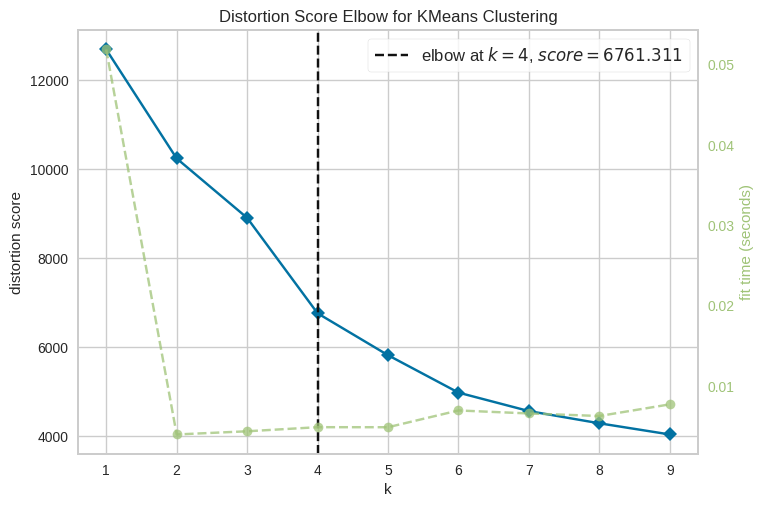

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
numeric_cols = df_binning.select_dtypes(include=['float64', 'int64'])  # Menyaring kolom numerik

# Inisialisasi KMeans
kmeans = KMeans(random_state=42)

# Tentukan visualizer dengan rentang jumlah cluster antara 1 hingga 10
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Melatih visualizer hanya pada data numerik
visualizer.fit(numeric_cols)

# Menampilkan plot Elbow
visualizer.show()

In [ ]:
# Mendapatkan kolom numerik
numeric_cols = df_binning.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Inisialisasi model KMeans dengan 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42)

# Latih model KMeans pada data numerik
kmeans.fit(df_binning[numeric_cols])

# Tambahkan hasil cluster ke DataFrame
df_binning['Cluster'] = kmeans.labels_

# Agregasi statistik fitur numerik berdasarkan cluster
aggregation_numerik = df_binning.groupby('Cluster')[numeric_cols].agg(['mean', 'min', 'max'])

# Menampilkan agregasi numerik
print("Agregasi Fitur Numerik:")
print(aggregation_numerik)

# Ambil kolom kategorikal sebelum One-Hot Encoding
categorical_cols = df_lencoder.select_dtypes(include=['object', 'category']).columns.tolist()

Agregasi Fitur Numerik:
        TransactionAmount                     CustomerAge                      \
                     mean       min       max        mean       min       max   
Cluster                                                                         
0               -0.220926 -1.019639  1.704938   -0.948300 -1.501409  0.749518   
1               -0.365116 -1.019432  1.276398    0.606051 -1.220043  1.987527   
2                1.984823  0.662095  5.578858    0.120582 -1.501409  1.987527   

        TransactionDuration                     LoginAttempts            \
                       mean       min       max          mean       min   
Cluster                                                                   
0                 -0.016706 -1.568628  2.577201      0.010516 -0.203745   
1                  0.030975 -1.568628  2.591547      0.004515 -0.203745   
2                 -0.076323 -1.568628  2.591547     -0.044760 -0.203745   

                  AccountBalance      

Jalankan cell code ini untuk menyimpan model kamu.

In [ ]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.

# Pilih fitur numerik yang ingin dipakai untuk clustering
features = df_binning[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']]

# Lakukan scaling pada fitur numerik untuk memastikan semuanya pada skala yang sama
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Inisialisasi model KMeans dengan 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

# Ambil label cluster hasil clustering
cluster_labels = kmeans.labels_

# Hitung Silhouette Score
score = silhouette_score(scaled_features, cluster_labels)

print(f"Silhouette Score: {score}")

Silhouette Score: 0.22631158484102973


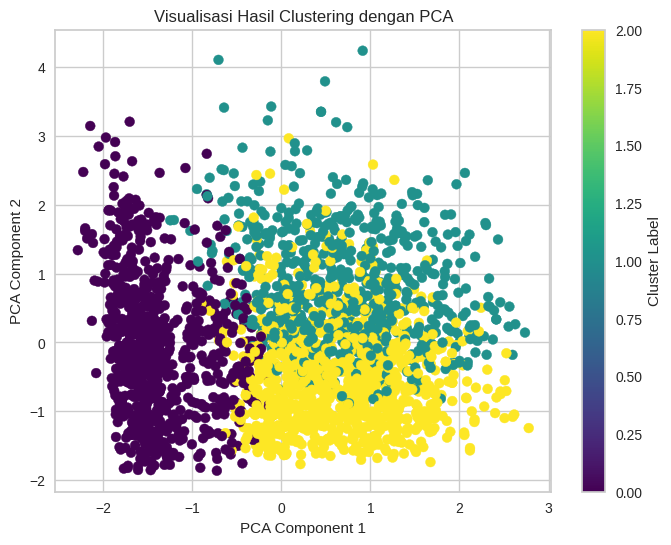

In [ ]:
# Membuat visualisasi hasil clustering

# Pilih fitur numerik yang ingin dipakai untuk clustering
features = df_binning[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']]

# Lakukan scaling pada fitur numerik
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Inisialisasi model KMeans dengan 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

# Ambil label cluster hasil clustering
cluster_labels = kmeans.labels_

# Menggunakan PCA untuk mereduksi dimensi (menjadi 2D untuk visualisasi)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Visualisasi Hasil Clustering dengan dua fitur PCA hasil reduksi
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('Visualisasi Hasil Clustering dengan PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

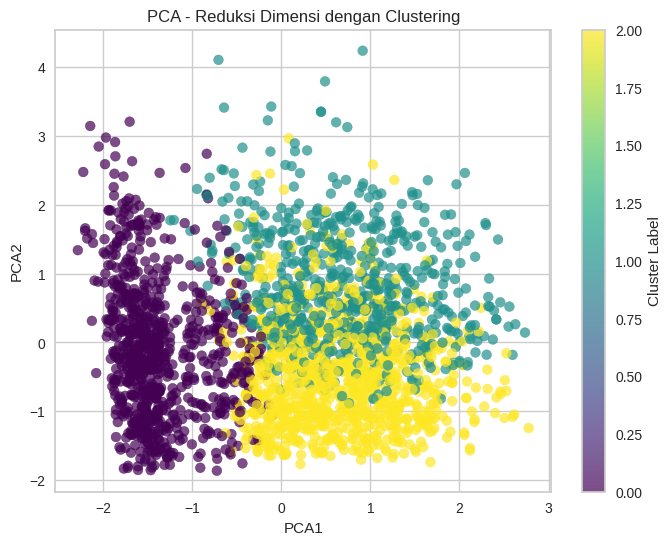

Rasio Varians per Komponen: [0.33072826 0.25069151]
Total Varians yang Dijelaskan: 0.5814197651846027


In [ ]:
# Membangun model menggunakan PCA.

# Pilih fitur numerik yang ingin dipakai untuk PCA
features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']

# Lakukan scaling pada fitur numerik untuk memastikan semuanya pada skala yang sama
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_binning[features])

# Inisialisasi model KMeans dengan 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

# Ambil label cluster hasil clustering
cluster_labels = kmeans.labels_

# Inisialisasi PCA dengan 2 komponen
pca = PCA(n_components=2)

# Fit dan transform data fitur menggunakan PCA
principal_components = pca.fit_transform(scaled_features)

# Membuat DataFrame untuk hasil PCA
pca_df = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])

# Visualisasi hasil PCA dengan warna berdasarkan cluster
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('PCA - Reduksi Dimensi dengan Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster Label')
plt.show()

# Menampilkan rasio varians yang dijelaskan dan total varians
print(f"Rasio Varians per Komponen: {pca.explained_variance_ratio_}")
print(f"Total Varians yang Dijelaskan: {sum(pca.explained_variance_ratio_)}")

In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [ ]:
# Menampilkan analisis deskriptif minimal mean untuk fitur numerik dan modus untuk fitur kategorikal.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

# Menambahkan hasil cluster ke DataFrame
df_binning['Cluster'] = cluster_labels

# Agregasi statistik untuk fitur numerik
numeric_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']
numeric_agg = df_binning.groupby('Cluster')[numeric_features].agg(
    ['min', 'max', 'mean', 'median', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]
)

# Agregasi statistik untuk fitur kategorikal
categorical_features = df_lencoder.select_dtypes(include=['object', 'category']).columns.tolist()

# Untuk kategori, kita hitung modus dan jumlah kategori yang muncul
categorical_agg = df_binning.groupby('Cluster')[categorical_features].agg(
    lambda x: x.mode()[0] if not x.mode().empty else None
)

# Menampilkan agregasi untuk fitur numerik
print("Agregasi Fitur Numerik per Cluster:")
print(numeric_agg)

# Menampilkan agregasi untuk fitur kategorikal
print("\nAgregasi Fitur Kategorikal per Cluster:")
print(categorical_agg)

Agregasi Fitur Numerik per Cluster:
        TransactionAmount                                                     \
                      min       max      mean    median       std <lambda_0>   
Cluster                                                                        
0               -1.019639  5.039555  0.051151 -0.273682  1.050783  -0.717439   
1               -1.019432  5.578858 -0.127845 -0.404562  0.912547  -0.759762   
2               -1.017644  5.275936  0.048438 -0.229339  1.009218  -0.706504   

                   CustomerAge                      ... TransactionDuration  \
        <lambda_1>         min       max      mean  ...                 std   
Cluster                                             ...                       
0         0.455476   -1.501409  0.524425 -1.047329  ...            0.955928   
1         0.235360   -1.501409  1.987527  0.244724  ...            0.811937   
2         0.450679   -1.276316  1.987527  0.711737  ...            0.580245   

        

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.

1. **Cluster 0: Nasabah dengan Transaksi Tinggi (High) dan Usia Muda (Young)**:
  - **Rata-rata (mean) <Fitur>:**
    *   TransactionAmount: 0.168224
    *   CustomerAge: -0.940818
    *   TransactionDuration: -0.509561
    *   AccountBalance: -0.803814
  - **Analisis:** Dalam Cluster ini mencakup nasabah yang memiliki transaksi yang lebih tinggi dibandingkan dengan cluster lainnya, dengan rata-rata usia yang relatif muda. Durasi transaksi mereka sedikit lebih tinggi daripada cluster lainnya, namun saldo mereka cenderung lebih rendah. Hal ini menunjukkan bahwa nasabah pada cluster ini mungkin lebih aktif dalam bertransaksi, tetapi dengan saldo yang tidak terlalu besar, yang dapat menunjukkan penggunaan transaksi yang lebih sering dalam jumlah yang lebih kecil.

2. **Cluster 1: Nasabah dengan Transaksi Sedang (Mid) dan Usia Dewasa (Middle)**:
  - **Rata-rata (mean) <Fitur>:**
    *   TransactionAmount: -0.182399
    *   CustomerAge: 0.588704
    *   TransactionDuration: -0.380118
    *   AccountBalance: 0.639022
  - **Analisis:** Dalam cluster ini mencakup nasabah memiliki transaksi yang sedang dan usia yang lebih dewasa dibandingkan dengan cluster lainnya. Durasi transaksi mereka sedikit lebih panjang, menunjukkan bahwa mereka mungkin lebih berhati-hati atau melakukan transaksi yang lebih kompleks. Selain itu, saldo mereka rata-rata lebih tinggi, yang mengindikasikan kemampuan finansial yang lebih besar untuk melakukan transaksi dalam jumlah yang lebih besar

3. **Cluster 2: Nasabah dengan Transaksi Rendah (Low) dan Usia Lebih Tua (Old)**:
  - **Rata-rata (mean) <Fitur>:**
    *   TransactionAmount: 0.089585
    *   CustomerAge: -0.096380
    *   TransactionDuration: 1.330526
    *   AccountBalance: -0.021019
  - **Analisis:** Dalam cluster ini mencakup nasabah yang lebih tua dengan transaksi yang relatif lebih rendah dibandingkan dengan cluster lainnya. Durasi transaksi mereka hampir sama dengan cluster lainnya, tetapi mereka memiliki saldo rata-rata yang lebih tinggi. Ini bisa menunjukkan bahwa meskipun nasabah ini tidak sering melakukan transaksi, mereka memiliki saldo yang cukup besar dan lebih jarang melakukan transaksi dalam jumlah besar.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_binning['Target'] = cluster_labels

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df_binning.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal

# Scaling data pada fitur numerik
features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']

# Lakukan scaling pada data dengan menggunakan StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_binning[features])

# Melakukan inverse transform pada data hasil scaling
inverse_scaled_data = scaler.inverse_transform(scaled_data)

# Membuat DataFrame hasil inverse transform
df_inverse = pd.DataFrame(inverse_scaled_data, columns=features)

# Menampilkan beberapa baris pertama dari DataFrame hasil inverse transform
print(df_inverse.head())

   TransactionAmount  CustomerAge  TransactionDuration  AccountBalance
0          -0.972081     1.424796            -0.550102        0.000725
1           0.273272     1.312249             0.310623        2.231209
2          -0.586250    -1.445136            -0.908738       -1.028491
3          -0.386079    -1.051223            -1.353446        0.892446
4          -0.974281     0.017967             1.128313        0.598462


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 0: Nasabah dengan Transaksi Rendah (Low) dan Usia Tua (Old)**:
  - **Rata-rata (mean) <Fitur>:**
      *   TransactionAmount: 14.09
      *   CustomerAge: 70.0
      *   TransactionDuration: 81.0
      *   AccountBalance: 5112.21
  - **Analisis:** Dalam cluster ini mencakup nasabah yang berusia lebih tua dengan transaksi yang relatif rendah. Meskipun saldo mereka lebih tinggi, durasi transaksi mereka lebih lama. Hal ini menunjukkan bahwa nasabah di cluster ini mungkin melakukan transaksi dalam jumlah kecil namun lebih berhati-hati dan memerlukan waktu lebih lama untuk menyelesaikan transaksi

2. **Cluster 1: Nasabah dengan Pengeluaran diatas Rata-rata(High) dan Usia Menengah(Middle)**:
  - **Rata-rata (mean) <Fitur>:**
      *   TransactionAmount: 376.24
      *   CustomerAge: 68.0
      *   TransactionDuration: 141.0
      *   AccountBalance: 13758.91
  - **Analisis:** Dalam cluster ini berisi nasabah yang memiliki transaksi lebih tinggi dibandingkan dengan cluster lainnya. Mereka juga memiliki usia yang relatif lebih tua dibandingkan dengan Cluster 0, dan saldo mereka lebih tinggi. Durasi transaksi mereka lebih panjang, yang bisa menunjukkan bahwa mereka lebih berhati-hati atau lebih cermat dalam melakukan transaksi besar

3. **Cluster 2: Nasabah dengan Transaksi Sedang (Mid) dan Usia Muda (Young)**:
  - **Rata-rata (mean) <Fitur>:**
      *   TransactionAmount: 126.29
      *   CustomerAge: 19.0
      *   TransactionDuration: 56.0
      *   AccountBalance: 1122.35
  - **Analisis:** Dalam cluster ini berisi nasabah yang lebih muda dengan transaksi yang lebih rendah dari rata-rata. Mereka memiliki durasi transaksi yang lebih singkat dibandingkan dengan cluster lainnya. Saldo mereka lebih rendah, yang mengindikasikan bahwa meskipun mereka mungkin lebih sering melakukan transaksi, nilai transaksi mereka cenderung lebih kecil

4. **Cluster 3: Nasabah Pengeluaran Sedang(Mid) dengan Usia Menengah(Middle)**:
  - **Rata-rata (mean) <Fitur>:**
      *   TransactionAmount: 184.50
      *   CustomerAge: 26.0
      *   TransactionDuration: 25.0
      *   AccountBalance: 8569.06
  - **Analisis:** Dalam cluster ini berisi nasabah memiliki transaksi yang relatif sedang, dengan usia yang masih muda namun lebih tua dibandingkan dengan Cluster 2. Mereka memiliki saldo yang lebih tinggi dan melakukan transaksi dengan durasi yang lebih singkat. Ini menunjukkan bahwa nasabah dalam cluster ini cenderung lebih cepat dalam melakukan transaksi dengan jumlah yang sedang dan saldo yang cukup besar

5. **Cluster 4: Nasabah Pengeluaran Sangat Rendah(Low) dan Tengah-tengah(Middle)**:
  - **Rata-rata (mean) <Fitur>:**
      *   TransactionAmount: 13.45
      *   CustomerAge: 45.0
      *   TransactionDuration: 198.0
      *   AccountBalance: 7429.40
  - **Analisis:** Dalam cluster ini berisi nasabah dengan usia menengah yang melakukan transaksi dengan jumlah rendah. Mereka memiliki saldo rata-rata yang cukup besar, namun durasi transaksi mereka lebih lama dibandingkan dengan cluster lainnya. Hal ini mungkin menunjukkan bahwa nasabah pada cluster ini lebih berhati-hati dalam bertransaksi, meskipun memiliki saldo yang cukup besar


(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df_inverse['Cluster'] = cluster_labels
print(df_inverse.head())

df_integrated = pd.concat([df, df_inverse], axis=1)
print(df_integrated.head())

ValueError: Length of values (2537) does not match length of index (548)

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df_integrated.to_csv('data_clustering_inverse.csv', index=False)